---------------
## Data Wrangling - Day5 HW

## Homework 5

Using all three datasets below we would like to determine if the usage patterns for users differ between different devices. See if you can ask some questions of your own. Here are some examples:

1. Does the platform being used impact the number of monthly mb used? 
2. Do users using Samsung devices use more call minutes than those using LGE devices? 

Idea from: https://www.kaggle.com/code/vin1234/merge-join-and-concat-with-pandas
Author: Vinay Vikram

- Looking at the data what columns can be used for merging? Do you see any you might need/want to rename?
- Make sure to say what you are doing in the merge and why you are choosing the specific merge type.
- Explain in detail your approach to answering the question, there is more than one right answer!
    


In [76]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
pd.set_option("display.max_columns", 100)


In [77]:
user_usage=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/user_usage.csv')
user_usage.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
5,71.59,79.26,1557.33,22793
6,71.59,79.26,519.12,22794
7,71.59,79.26,519.12,22795
8,30.92,22.77,3114.67,22799
9,69.80,14.70,25955.55,22801


In [78]:
user_device=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/user_device.csv')
user_device.head(10)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
5,22787,12921,android,4.3,GT-I9505,1
6,22788,28714,android,6.0,SM-G930F,1
7,22789,28714,android,6.0,SM-G930F,1
8,22790,29592,android,5.1,D2303,1
9,22791,28775,ios,10.2,"iPhone6,2",3


In [106]:
device=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/android_devices.csv')
device.head(10)

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


### Looking at the data what columns can be used for merging? 

In [91]:
#STEP 1: Merge user_usage and user_device

two_of_three = pd.merge(
    user_usage,             # left table → contains user behavior (mins, SMS, MB)
    user_device,            # right table → contains device + platform info
    on="use_id",            # column they both share → unique user identifier
    how="inner"             # inner join → keep ONLY users that exist in BOTH tables
)

# check how many rows/columns we got back
print(two_of_three.shape)

# display the merged dataframe
display(two_of_three.head(10))


(159, 9)


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921,android,4.3,GT-I9505,1
1,1710.08,136.88,7267.55,22788,28714,android,6.0,SM-G930F,1
2,1710.08,136.88,7267.55,22789,28714,android,6.0,SM-G930F,1
3,94.46,35.17,519.12,22790,29592,android,5.1,D2303,1
4,71.59,79.26,1557.33,22792,28217,android,5.1,SM-G361F,1
5,71.59,79.26,1557.33,22793,28217,android,5.1,SM-G361F,1
6,71.59,79.26,519.12,22794,28217,android,5.1,SM-G361F,1
7,71.59,79.26,519.12,22795,28217,android,5.1,SM-G361F,1
8,30.92,22.77,3114.67,22799,29643,android,6.0,ONEPLUS A3003,1
9,69.80,14.70,25955.55,22801,10976,android,4.4,GT-I9505,1


I merged user_usage (how much people use their phones) with user_device (what device/platform they have).
I used use_id because it’s the shared key that matches the same user across both tables.


### Why you are choosing the specific merge type.
I used an inner join because I only want users that show up in both tables.
If someone has usage but no device info, or a device but no usage info, they won’t help answer my questions.
Result: now I have both usage + device info in the same table (two_of_three).

### Do you see any you might need/want to rename?

I renamed the 3rd table to device_catalog so it’s clearer in my code that this table is a catalog of Android devices. 

I noticed that in device_catalog the column is called Device while in user_device it’s called device. Since pandas only merges when the column names match, I renamed device → Device. After this, I could merge all three tables together. 


In [81]:
#I am renaming the device table to device_catalog because it's giving me error when I was renaming Device-device. Column name and table name can't be same.

device=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/android_devices.csv')


In [82]:
device_catalog =pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/android_devices.csv')

device_catalog.head(10)
#my new renamed table

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


In [83]:
# rename Device -> device so the column matches for merging
device_catalog.rename(columns={'Device': 'device'}, inplace=True)

print("device table columns after rename:", device_catalog.columns.tolist())
display(device_catalog.head(5))


device table columns after rename: ['Retail Branding', 'Marketing Name', 'device', 'Model']


,Retail Branding,Marketing Name,device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


Anika's note

 why .head(5)?
.head() → by default shows the first 5 rows.
.head(5) → does the same explicitly (show 5 rows).
we use it to double-check that the column rename worked and to see what the data looks like.
it’s faster and cleaner than printing the entire dataset, especially when it has thousands of rows.

In [84]:
final_df = pd.merge(
    two_of_three,   # usage + platform/device
    device_catalog,         # catalog (Retail Branding, Marketing Name, Model)
    on="device",    # common key after renaming
    how="inner"
)

print("final_df shape:", final_df.shape)
display(final_df.head(10))


final_df shape: (19, 12)


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,Retail Branding,Marketing Name,Model
0,94.46,35.17,519.12,22790,29592,android,5.1,D2303,1,Sony,Xperia M2,D2303
1,283.30,107.47,15573.33,22806,21615,android,6.0,A0001,1,OnePlus,OnePlus One,A0001
2,283.30,107.47,15573.33,22806,21615,android,6.0,A0001,1,OnePlus,OnePlus One,One
3,244.88,105.95,1557.33,22832,29295,android,6.0,D5803,1,Sony,Xperia Z3 Compact,D5803
4,135.09,42.02,5191.12,22833,24847,android,6.0,E6653,1,Sony,Xperia Z5,E6653
5,57.49,16.73,15573.33,22839,29655,android,6.0,A0001,1,OnePlus,OnePlus One,A0001
6,57.49,16.73,15573.33,22839,29655,android,6.0,A0001,1,OnePlus,OnePlus One,One
7,99.23,35.58,519.12,22854,29592,android,5.1,D2303,1,Sony,Xperia M2,D2303
8,43.03,0.47,2076.45,22882,29666,android,6.0,F3111,1,Sony,Xperia XA,F3111
9,43.03,0.47,2076.45,22883,29666,android,6.0,F3111,1,Sony,Xperia XA,F3111


### 1. Does the platform being used impact the number of monthly mb used? 

            n     mean   median      std
platform                                
android   157  4221.39  2076.45  5236.85
ios         2   961.16   961.16   438.74


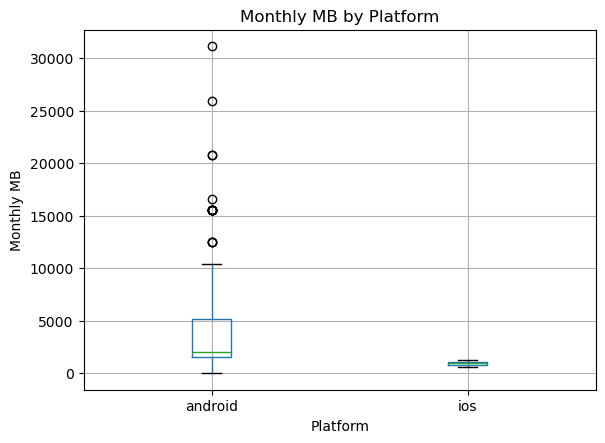

In [86]:
# Compare Android vs iOS on monthly_mb
platform_mb = (
    two_of_three.groupby("platform")["monthly_mb"]
    .agg(n="count", mean="mean", median="median", std="std")
    .round(2)
)
print(platform_mb)

# Boxplot for a visual comparison
two_of_three.boxplot(column="monthly_mb", by="platform")
plt.title("Monthly MB by Platform")
plt.suptitle("")
plt.xlabel("Platform")
plt.ylabel("Monthly MB")
plt.show()


I grouped by platform (Android vs iOS) and compared their monthly MB usage.
Android users (157 people) have a much higher average (4221 MB) and median (2076 MB) compared to iOS users (2 people, 961 MB).
This suggests that Android users in this dataset tend to use more data than iOS users.
However, the iOS group only has 2 users, so the sample is too small to draw a strong conclusion. The difference might reflect the small sample rather than a true platform effect.

### 2. Do users using Samsung devices use more call minutes than those using LGE devices? 


In [99]:
brand_minutes = (
    sub.groupby("Retail Branding")["outgoing_mins_per_month"]
    .agg(n="count", mean="mean", median="median", std="std")
    .round(2)
)

print(brand_minutes)


Empty DataFrame
Columns: [n, mean, median, std]
Index: []


The DataFrame looks empty. Now I will check if I have Samsung and LGE in my dataset

In [103]:
print(final_df["Retail Branding"].unique())

['Sony' 'OnePlus' 'Lava']


So there are no Samsung or LGE rows to compare— inner-join kept only users whose devices mapped to brands in the catalog, and in this sample those happen to be Sony, OnePlus, and Lava. That’s why your Samsung vs LGE table came out empty.

### A) Compare two brands you do have (e.g., OnePlus vs Sony)

In [104]:
brands_to_compare = ["OnePlus", "Sony"]

sub = final_df[final_df["Retail Branding"].isin(brands_to_compare)].copy()

brand_minutes = (
    sub.groupby("Retail Branding")["outgoing_mins_per_month"]
       .agg(n="count", mean="mean", median="median", std="std")
       .round(2)
)
print(brand_minutes)

                  n   mean  median     std
Retail Branding                           
OnePlus           4  170.4  170.40  130.37
Sony             13  143.7   99.23  112.09


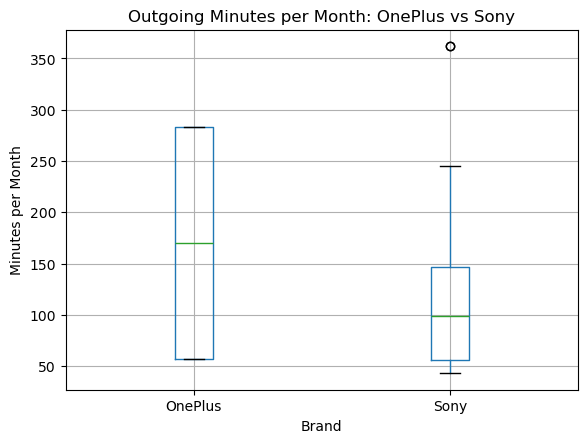

In [105]:
# Visual
sub.boxplot(column="outgoing_mins_per_month", by="Retail Branding")
plt.title(f"Outgoing Minutes per Month: {brands_to_compare[0]} vs {brands_to_compare[1]}")
plt.suptitle("")
plt.xlabel("Brand"); plt.ylabel("Minutes per Month")
plt.show()

I compared outgoing call minutes between OnePlus (n=4) and Sony (n=13).
OnePlus users: mean ≈ 170 minutes, median ≈ 170 minutes.
Sony users: mean ≈ 144 minutes, median ≈ 99 minutes.
This shows that OnePlus users talk more on average and by median compared to Sony users.
However, the sample size is small, especially for OnePlus (only 4 users), and the variation (std ~130) is quite large.
So while OnePlus users appear to use more call minutes, we cannot say this with strong confidence — it may just be due to the small dataset.